In [1]:
import pandas as pd
import random
import functools
import matplotlib.pyplot as plt
from abtest.utils import epsilon_greedy, thompson_sampling, UCB1

In [2]:
from scipy.stats import beta
import numpy as np

In [3]:
np.random.beta(10,30)

0.20771290644800416

In [22]:
var_A ={'code': 'A', 'impressions': 1, 'conversions': 1, 'conversion_rate': 1.0, 'html_template': 'abtest/homepage_A.html'}
var_B ={'code': 'B', 'impressions': 1, 'conversions': 1, 'conversion_rate': 1.0, 'html_template': 'abtest/homepage_B.html'}
var_C ={'code': 'C', 'impressions': 1, 'conversions': 1, 'conversion_rate': 1.0, 'html_template': 'abtest/homepage_C.html'}

In [23]:
variants = [var_A, var_B, var_C]

In [24]:
UCB1(variants)

{'code': 'C',
 'impressions': 1,
 'conversions': 1,
 'conversion_rate': 1.0,
 'html_template': 'abtest/homepage_C.html'}

In [25]:
num_A = 0
num_B = 0
num_C = 0
for i in range(1000):
    variants = [var_A, var_B, var_C]
    code = UCB1(variants)['code']
    if code == 'A': 
        num_A+=1
        if random.random() < 0.5:
            var_A['impressions'] +=1
        else:
            var_A['impressions'] +=1
            var_A['conversions'] +=1
        var_A['conversion_rate'] = var_A['conversions']/var_A['impressions']
            
    if code == 'B': 
        num_B+=1
        if random.random() < 0.3:
            var_B['impressions'] +=1
        else:
            var_B['impressions'] +=1
            var_B['conversions'] +=1
        var_B['conversion_rate'] = var_B['conversions']/var_B['impressions']

    if code == 'C': 
        num_C+=1
        if random.random() < 0.5:
            var_C['impressions'] +=1
        else:
            var_C['impressions'] +=1
            var_C['conversions'] +=1
        var_C['conversion_rate'] = var_C['conversions']/var_C['impressions']

In [26]:
var_A

{'code': 'A',
 'impressions': 129,
 'conversions': 67,
 'conversion_rate': 0.5193798449612403,
 'html_template': 'abtest/homepage_A.html'}

In [27]:
var_B

{'code': 'B',
 'impressions': 782,
 'conversions': 558,
 'conversion_rate': 0.7135549872122762,
 'html_template': 'abtest/homepage_B.html'}

In [28]:
var_C

{'code': 'C',
 'impressions': 92,
 'conversions': 43,
 'conversion_rate': 0.4673913043478261,
 'html_template': 'abtest/homepage_C.html'}

In [29]:
print(num_A, num_B, num_C)

128 781 91


In [30]:
def plot_beta(variants):
    x = np.linspace(0,1,200)
    for var in variants:
        y = beta.pdf(x, var['conversions'], var['impressions'] - var['conversions'])
        plt.plot(x, y)

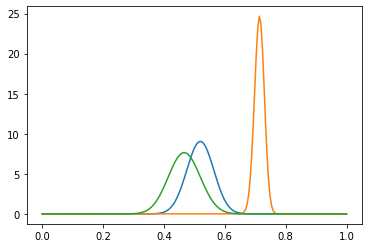

In [31]:
plot_beta([var_A, var_B, var_C])

In [14]:
from scipy.special import beta


In [30]:
for i in range(100000): 
    beta(2,3)

In [192]:
random.sample([1,3,0],1)

[3]

In [160]:
import functools

def ab_campaign(func=None, campaign=None):
    template=''
    def _decorator(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            return func(*args, template=template, **kwargs)
        return wrapper
    return _decorator

In [161]:

@ab_campaign(campaign='12311')
def hello(**kwargs):
    
    return(kwargs)

In [159]:
hello(z='ho')

{'template': '', 'z': 'ho'}